In [ ]:
#Importing pandas library and reading the data from the csv file
import pandas as pd
data=pd.read_csv('Fraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
data.shape

(6362620, 11)

6362620 rows and 11 columns are present.

In [ ]:
#Checking for null vales
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Null values are present in the dataset. 

In [ ]:
#Displaying the rows that contain the null values
data[data.isnull().any(axis=1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [ ]:
data[data['nameOrig']=='C1038147807']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
695950,36,CASH_OUT,534433.97,C1038147807,30434.0,0.0,C1848072402,0.0,534433.97,0,0


This row entry makes it suspecious entry as it has no data under various columns such as old balance destination, new balance destination which are important information. Therefore I drop it.

In [ ]:
data['nameOrig'].value_counts()

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

In [ ]:
#Dropping null values
data=data.dropna()

In [ ]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Now there are no null values.

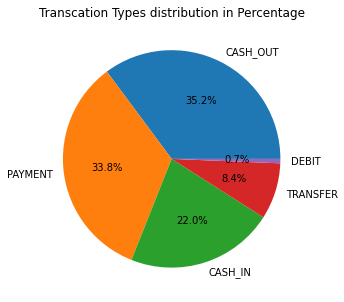

In [ ]:
#Visualisation
from matplotlib import pyplot as plt

types=data['type'].value_counts()
fig1, ax1=plt.subplots(figsize=(6,5))
plt.title("Transcation Types distribution in Percentage")
plt.pie(types, labels=types.index, autopct='%1.1f%%')
plt.show()

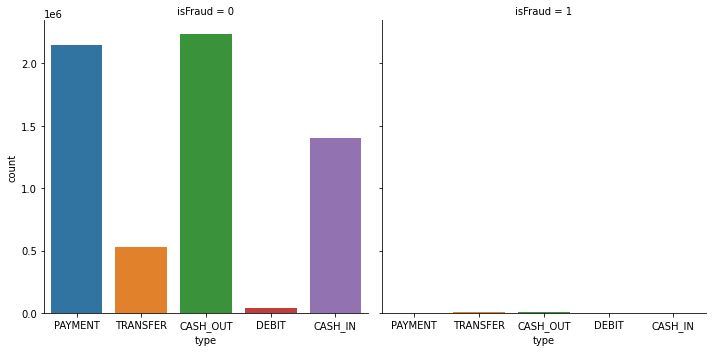

In [ ]:
import seaborn as sns
sns.catplot(x="type", col="isFraud", data=data, kind="count");

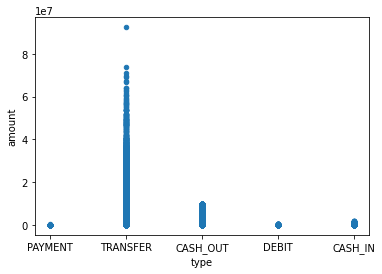

In [ ]:
data.plot.scatter(x='type', y='amount')

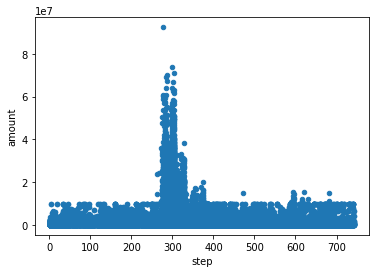

In [ ]:
data.plot.scatter(x='step', y='amount')

In [ ]:
data[data.isFlaggedFraud==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [ ]:
req=data[data.isFraud==1]
req

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [ ]:
req.type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

Only in transfer and cash out types the fraud is detected. 

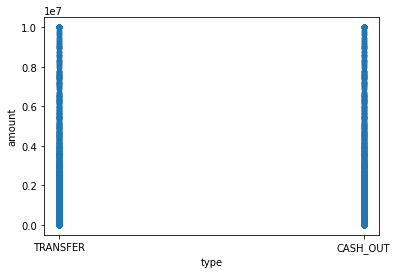

In [ ]:
req.plot.scatter(x='type', y='amount')

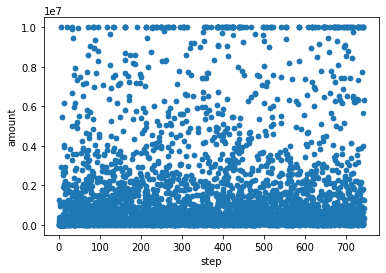

In [ ]:
req.plot.scatter(x='step', y='amount')

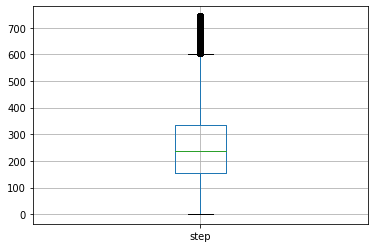

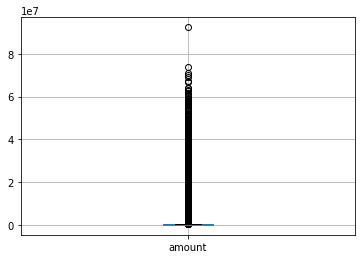

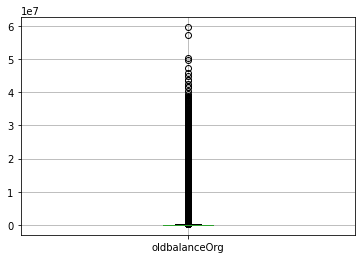

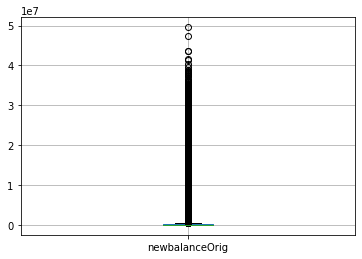

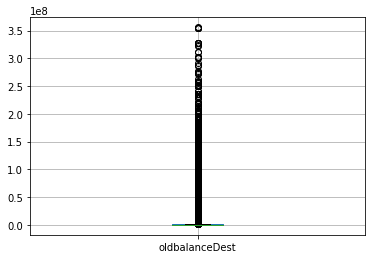

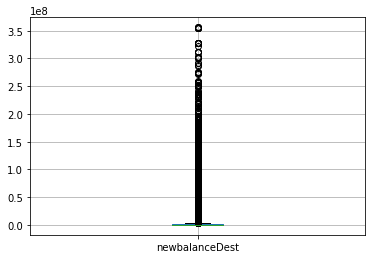

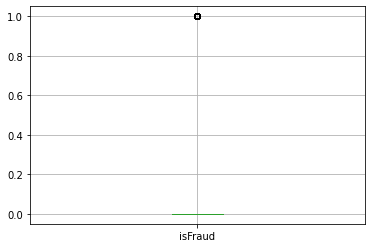

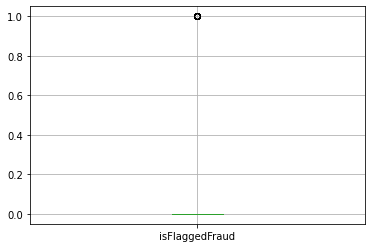

In [ ]:
#Boxplot
df1=data.select_dtypes(exclude=['object'])
for column in df1:
    plt.figure()
    df1.boxplot([column])

There is outliers in various columns such as amount, oldbalaceOrg etc because this dataset is dealing with transaction and balance of money, the data is bound to exceed and not follow the usual trend as there are transcation being involved of the rich users. Thus I chose to keep them untouched. 

In [ ]:
#Correlation
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [ ]:
data.corr().isFraud.sort_values()

newbalanceOrig   -0.008148
oldbalanceDest   -0.005885
newbalanceDest    0.000535
oldbalanceOrg     0.010154
step              0.031578
isFlaggedFraud    0.044109
amount            0.076688
isFraud           1.000000
Name: isFraud, dtype: float64

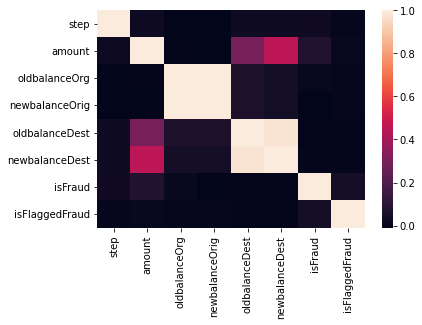

In [ ]:
from seaborn import heatmap
heatmap(data.corr())

From the heat map its clear that none of the attributes show a strong correlation with any other attribute.

In [ ]:
#Converting categorical data to numerical data
data['type'] = data['type'].map({'PAYMENT':1, 'TRANSFER':2, 'CASH_OUT':3, 'DEBIT':4, 'CASH_IN':5})

In [ ]:
data['isFraud'].sum() / len(data)

0.001290820448180152

0.12% of data observations are Fraud which means that the model were to never predict a payment to be fraud, it would still be nearly 99.9% accurate. For this I have used: Precision, Recall, and F1 score using classification report.

**Model Fitting**

In [ ]:
#Dividing the dataset in training and testing set

import numpy as np
from sklearn.model_selection import train_test_split

x = np.array(data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']])
y = np.array(data[['isFraud']])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

# creating model
model = DecisionTreeClassifier()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 0.9999998035400511
Testing accuracy : 0.9996943083195288


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score

print('Decision Tree Recall:', recall_score(y_test, y_pred))
print('classification_report:', classification_report(y_test, y_pred))
print('confusion_matrix:', confusion_matrix(y_test, y_pred))
dt=model

Decision Tree Recall: 0.8675937122128174
classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270870
           1       0.89      0.87      0.88      1654

    accuracy                           1.00   1272524
   macro avg       0.95      0.93      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524

confusion_matrix: [[1270700     170]
 [    219    1435]]


1 implies its Fraud. 
0 implies it's not Fraud

In [ ]:
data1 = np.array([[6, 80000, 80000, 0.0]])
model.predict(data1)

array([1])

Fraud

In [ ]:
data2 = np.array([[5, 7880, 7880, 0.0]])
model.predict(data2)

array([1])

Fraud

In [ ]:
data3= np.array([[1, 10000, 5000, 100]])
model.predict(data3)

array([0])

Not Fraud

In [ ]:
data4= np.array([[4, 9000.60, 9000.60, 0.0]])
model.predict(data4)

array([0])

Not Fraud

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

# creating the model
model = LogisticRegression()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy : 0.9995051173887487
Testing accuracy : 0.9994860607737064


In [ ]:
print('Logistic Regression Recall:', recall_score(y_test, y_pred))
print('classification_report:', classification_report(y_test, y_pred))
print('confusion_matrix:', confusion_matrix(y_test, y_pred))
lr=model

Logistic Regression Recall: 0.9758162031438936
classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270870
           1       0.72      0.98      0.83      1654

    accuracy                           1.00   1272524
   macro avg       0.86      0.99      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524

confusion_matrix: [[1270256     614]
 [     40    1614]]


**Model Evalution**

The Logistic Regression models outperform the Decision Tree model by a wide margin. But still I'll do the cross validation.

In [ ]:
#Cross-validation
from sklearn.model_selection import cross_validate

# Running the cross-validation on both Decision Tree and Random Forest models; specifying recall as the scoring metric
dt_scores = cross_validate(dt, x_test, y_test, scoring='recall_macro')
lr_scores = cross_validate(lr, x_test, y_test, scoring='recall_macro')

# Printing the means of the cross-validations for both models
print('Decision Tree Recall Cross-Validation:', np.mean(dt_scores['test_score']))
print('Logistic Regression Recall Cross-Validation:', np.mean(lr_scores['test_score']))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Decision Tree Recall Cross-Validation: 0.8907619242662905
Logistic Regression Recall Cross-Validation: 0.9304083392226822


Conclusion:
Upon training and then evaluating the classification models, the Logistic regression model performes the best.